#1 Data preparation


In [49]:
%%bash

###########################################
#### RUN THIS CELL TO PREPARE DATA ########
###########################################
pip install -q gdown
gdown -q 1VEG0qsiD5CZqyKSv5k6TceJbLOCt2yp7
echo 'download: done => file: animals.zip'
rm -rf ./animals/
unzip -q animals.zip
echo 'Data files in: /content/animals/'


download: done => file: animals.zip
Data files in: /content/animals/


#2 Samples

In [50]:
import glob
import os

#list all files and directories in a folder; here, ./animals/
os.listdir('./animals/')

['horse', 'goose', 'meta.txt', 'cat', 'dog', 'chicken']

In [51]:
#path is a file?
os.path.isfile('./animals/cat')

False

In [52]:
#path is a directory?

os.path.isdir('./animals/cat')

True

In [53]:
#path is a file?
os.path.isfile('./animals/meta.txt')

True

In [54]:
#path is a directory?
os.path.isdir('./animals/meta.txt')

False

In [55]:
# get file-size in bytes
os.path.getsize('./animals/cat/cat-1.jpg')

6828

In [56]:
#list all files a given extension; here, *.jpg
files = glob.glob("./animals/cat/*.jpg")
files

['./animals/cat/cat-1.jpg',
 './animals/cat/cat-6.jpg',
 './animals/cat/cat-2.jpg',
 './animals/cat/cat-4.jpg']

In [57]:
data_path = './animals'
class_path = 'dog'
file = 'dog-1.jpg'
path1 = os.path.join(data_path, class_path)
path2 = os.path.join(data_path, class_path, file)
print(path1)
print(path2)

./animals/dog
./animals/dog/dog-1.jpg


#3 Exercises

In [58]:
import functools as F
def add(x, y):
  print(x, y)

  return x+y
#F.reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])
F.reduce(add, [1, 2, 3, 4, 5], 0)
F.reduce(lambda x, y: x*y, [1, 2, 3, 4], 1)

0 1
1 2
3 3
6 4
10 5


24

##Q.1

In [59]:
"""
Fill code this cell to:
1. list all of classes (sub-folders of the folder sepecified in 'path_to_data')
2. assign variables 'classes' to contain the classes discovered in previous step.
"""

import glob
import os

path_to_data = './animals/'
classes = []
list_dir_file = os.listdir('./animals/')

for i in list_dir_file:
    if os.path.isdir(f'./animals/{i}'):
        classes.append(i)

print(classes)




['horse', 'goose', 'cat', 'dog', 'chicken']


##Q.2

In [60]:
"""
Fill code this cell to:
1. create a dictionary (named: class2counts)
  to map from classes (folders) to their number of data files stored the folders

NOTE: use comprehension instead of for-loop
"""

path_to_data = './animals/'
class2counts = {}

for i in classes:
    class2counts[i] = len([x for x in os.listdir(f"./animals/{i}/") if os.path.isfile(f"./animals/{i}/{x}")])

# print(os.listdir('./animals/cat/'))

print(class2counts)


{'horse': 5, 'goose': 3, 'cat': 6, 'dog': 7, 'chicken': 5}


##Q.3

In [61]:
"""
Fill code this cell to:
1. list all files in the folder stored in variable "path_to_data"
2. store the returned filenames in a list named: files
3. make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

def list_file(file_path):
    list_file = []
    for i in os.listdir(f'{path_to_data}{file_path}'):
        if os.path.isfile(f'{path_to_data}{file_path}/{i}'):
            file_path_value = f"{path_to_data}{file_path}/{i}"
            list_file.append(file_path_value)
    return list_file 

classes = [x for x in os.listdir(path_to_data) if os.path.isdir(f"{path_to_data}{x}")]

list_file_overall = []
for x in classes:
    file_list = list_file(x)
    list_file_overall += file_list

list_file_overall


['./animals/horse/horse-2.jpg',
 './animals/horse/horse-5.jpg',
 './animals/horse/horse-4.jpg',
 './animals/horse/horse-1.jpg',
 './animals/horse/horse-3.jpeg',
 './animals/goose/g3.jpg',
 './animals/goose/g1.jpg',
 './animals/goose/g2.jpg',
 './animals/cat/cat-1.jpg',
 './animals/cat/cat-3.jpeg',
 './animals/cat/cat-6.jpg',
 './animals/cat/cat-2.jpg',
 './animals/cat/cat-4.jpg',
 './animals/cat/cat-5.jpeg',
 './animals/dog/dog-1.jpg',
 './animals/dog/dog-5.jpeg',
 './animals/dog/dog-7.jpg',
 './animals/dog/dog-6.jpg',
 './animals/dog/dog-2.jpg',
 './animals/dog/dog-4.jpeg',
 './animals/dog/dog-3.jpg',
 './animals/chicken/c5.jpg',
 './animals/chicken/c2.jpg',
 './animals/chicken/c4.jpeg',
 './animals/chicken/c1.jpg',
 './animals/chicken/c3.jpg']

##Q.4

In [62]:
"""
Fill code this cell to:
1. list all files in the folder stored in variable "path_to_data"
2. create a dictionary to map each file to its label (class)
3. make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F
import os 

path_to_data = './animals/'

def list_file(file_path):
    list_file = {}
    for i in os.listdir(f'{path_to_data}{file_path}'):
        if os.path.isfile(f'{path_to_data}{file_path}/{i}'):
            file_path_value = f"{path_to_data}{file_path}/{i}"
            list_file[file_path_value] = f'{file_path}'
    return list_file 

classes = [x for x in os.listdir(path_to_data) if os.path.isdir(f"{path_to_data}{x}")]

list_file_overall = {}
for x in classes:
    file_list = list_file(x)
    list_file_overall.update(file_list)


list_file_overall

{'./animals/horse/horse-2.jpg': 'horse',
 './animals/horse/horse-5.jpg': 'horse',
 './animals/horse/horse-4.jpg': 'horse',
 './animals/horse/horse-1.jpg': 'horse',
 './animals/horse/horse-3.jpeg': 'horse',
 './animals/goose/g3.jpg': 'goose',
 './animals/goose/g1.jpg': 'goose',
 './animals/goose/g2.jpg': 'goose',
 './animals/cat/cat-1.jpg': 'cat',
 './animals/cat/cat-3.jpeg': 'cat',
 './animals/cat/cat-6.jpg': 'cat',
 './animals/cat/cat-2.jpg': 'cat',
 './animals/cat/cat-4.jpg': 'cat',
 './animals/cat/cat-5.jpeg': 'cat',
 './animals/dog/dog-1.jpg': 'dog',
 './animals/dog/dog-5.jpeg': 'dog',
 './animals/dog/dog-7.jpg': 'dog',
 './animals/dog/dog-6.jpg': 'dog',
 './animals/dog/dog-2.jpg': 'dog',
 './animals/dog/dog-4.jpeg': 'dog',
 './animals/dog/dog-3.jpg': 'dog',
 './animals/chicken/c5.jpg': 'chicken',
 './animals/chicken/c2.jpg': 'chicken',
 './animals/chicken/c4.jpeg': 'chicken',
 './animals/chicken/c1.jpg': 'chicken',
 './animals/chicken/c3.jpg': 'chicken'}

##Q.5


In [63]:
s = "="*20
s

'===================='

In [64]:
L = [1]*3
L

[1, 1, 1]

In [65]:
x, y, z = 10, 20, 30
print(x, y, z)
s = "{:<6.2f}, {:>6.2f}, {:^6.2f}".format(x, y, z)

print(s)

10 20 30
10.00 ,  20.00, 30.00 


In [66]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F
import os 

path_to_data = './animals/'

def dict_file(file_path):
    list_dict = []
    for i in os.listdir(f'{path_to_data}{file_path}'):
        if os.path.isfile(f'{path_to_data}{file_path}/{i}'):
            file_path_value = f"{path_to_data}{file_path}/{i}"
            file_size = os.path.getsize(file_path_value)
            object_dict = {
                'File Name': file_path_value,
                'File Size': file_size, 
                'File Label': file_path
            }

            list_dict.append(object_dict)
    return list_dict



classes = [x for x in os.listdir(path_to_data) if os.path.isdir(f"{path_to_data}{x}")]

list_file_overall = []
for x in classes:
    file_list = dict_file(x)
    list_file_overall.extend(file_list)

print("=" * 75)
print("File' name".ljust(35) + "|" + " File's size".rjust(20) + "|" + " File's label".rjust(10))
print("=" * 75)

for i in list_file_overall: 
    file_name = i["File Name"]
    file_size = i["File Size"]
    file_label = i["File Label"]
    print(f"{file_name}".ljust(35) + "|" + f" {file_size}".rjust(20) + "|" + f" {file_label}".rjust(10))



File' name                         |         File's size| File's label
./animals/horse/horse-2.jpg        |                9533|     horse
./animals/horse/horse-5.jpg        |                6595|     horse
./animals/horse/horse-4.jpg        |                5907|     horse
./animals/horse/horse-1.jpg        |                9122|     horse
./animals/horse/horse-3.jpeg       |                5612|     horse
./animals/goose/g3.jpg             |                6240|     goose
./animals/goose/g1.jpg             |                7347|     goose
./animals/goose/g2.jpg             |               10995|     goose
./animals/cat/cat-1.jpg            |                6828|       cat
./animals/cat/cat-3.jpeg           |                8725|       cat
./animals/cat/cat-6.jpg            |                4526|       cat
./animals/cat/cat-2.jpg            |                7784|       cat
./animals/cat/cat-4.jpg            |                6444|       cat
./animals/cat/cat-5.jpeg           |         

In [67]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE SORTED in file's label
* use comprehension if possible
"""
import functools as F

sorted_list = sorted(list_file_overall, key=lambda d: d['File Label'])

print("=" * 75)
print("File' name".ljust(35) + "|" + " File's size".rjust(20) + "|" + " File's label".rjust(10))
print("=" * 75)

for i in sorted_list: 
    file_name = i["File Name"]
    file_size = i["File Size"]
    file_label = i["File Label"]
    print(f"{file_name}".ljust(35) + "|" + f" {file_size}".rjust(20) + "|" + f" {file_label}".rjust(10))





File' name                         |         File's size| File's label
./animals/cat/cat-1.jpg            |                6828|       cat
./animals/cat/cat-3.jpeg           |                8725|       cat
./animals/cat/cat-6.jpg            |                4526|       cat
./animals/cat/cat-2.jpg            |                7784|       cat
./animals/cat/cat-4.jpg            |                6444|       cat
./animals/cat/cat-5.jpeg           |                8374|       cat
./animals/chicken/c5.jpg           |                6538|   chicken
./animals/chicken/c2.jpg           |                5619|   chicken
./animals/chicken/c4.jpeg          |                4985|   chicken
./animals/chicken/c1.jpg           |               10598|   chicken
./animals/chicken/c3.jpg           |               11038|   chicken
./animals/dog/dog-1.jpg            |                5936|       dog
./animals/dog/dog-5.jpeg           |                6091|       dog
./animals/dog/dog-7.jpg            |         

##Q.6

In [68]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE SORTED in file's size
* use comprehension if possible
"""
import functools as F

sorted_list = sorted(list_file_overall, key=lambda d: d['File Size'])

print("=" * 75)
print("File' name".ljust(35) + "|" + " File's size".rjust(20) + "|" + " File's label".rjust(10))
print("=" * 75)

for i in sorted_list: 
    file_name = i["File Name"]
    file_size = i["File Size"]
    file_label = i["File Label"]
    print(f"{file_name}".ljust(35) + "|" + f" {file_size}".rjust(20) + "|" + f" {file_label}".rjust(10))





File' name                         |         File's size| File's label
./animals/cat/cat-6.jpg            |                4526|       cat
./animals/chicken/c4.jpeg          |                4985|   chicken
./animals/horse/horse-3.jpeg       |                5612|     horse
./animals/chicken/c2.jpg           |                5619|   chicken
./animals/dog/dog-2.jpg            |                5756|       dog
./animals/horse/horse-4.jpg        |                5907|     horse
./animals/dog/dog-1.jpg            |                5936|       dog
./animals/dog/dog-5.jpeg           |                6091|       dog
./animals/goose/g3.jpg             |                6240|     goose
./animals/cat/cat-4.jpg            |                6444|       cat
./animals/chicken/c5.jpg           |                6538|   chicken
./animals/horse/horse-5.jpg        |                6595|     horse
./animals/cat/cat-1.jpg            |                6828|       cat
./animals/goose/g1.jpg             |         

##Q.7

In [69]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE RE-ORDERED RAMDOMLY: use function 'random.sample'
* use comprehension if possible
"""
import functools as F
import random

path_to_data = './animals/'

random_list = random.sample(list_file_overall, len(list_file_overall))

print("=" * 75)
print("File' name".ljust(35) + "|" + " File's size".rjust(20) + "|" + " File's label".rjust(10))
print("=" * 75)

for i in random_list: 
    file_name = i["File Name"]
    file_size = i["File Size"]
    file_label = i["File Label"]
    print(f"{file_name}".ljust(35) + "|" + f" {file_size}".rjust(20) + "|" + f" {file_label}".rjust(10))






File' name                         |         File's size| File's label
./animals/dog/dog-6.jpg            |                8562|       dog
./animals/dog/dog-5.jpeg           |                6091|       dog
./animals/cat/cat-2.jpg            |                7784|       cat
./animals/dog/dog-1.jpg            |                5936|       dog
./animals/dog/dog-3.jpg            |                7491|       dog
./animals/horse/horse-5.jpg        |                6595|     horse
./animals/chicken/c5.jpg           |                6538|   chicken
./animals/cat/cat-5.jpeg           |                8374|       cat
./animals/chicken/c1.jpg           |               10598|   chicken
./animals/chicken/c3.jpg           |               11038|   chicken
./animals/cat/cat-4.jpg            |                6444|       cat
./animals/dog/dog-7.jpg            |                8409|       dog
./animals/horse/horse-4.jpg        |                5907|     horse
./animals/chicken/c4.jpeg          |         

In [70]:
import cv2
import matplotlib.pyplot as plt


filename = "./animals/horse/horse-1.jpg"


##Q.8
The cell followed shows an example for reading and displaying image from a given file.

* Note: the figure's title is the label of the image

In [71]:
def foo(*param):
  print(len(param))

foo(1,2,3,4)

foo(1,2,3,4,5)
L = ["a", "b", "c"]
foo(*L)

def bar(param_1, K="10", L="A", M=100):
  print(K)
  print(L)
  print(M)


D = {
    "K": 10,
    "L": 20,
    "M": 30
}

bar(100, **D)
bar(20, M="1", L=2)

4
5
3
10
20
30
10
2
1


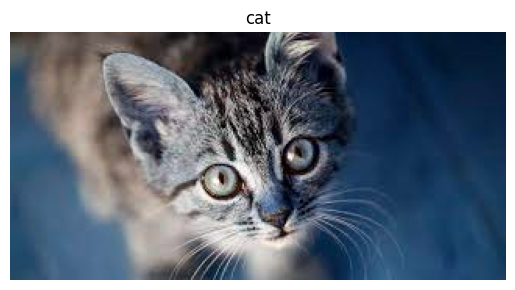

In [72]:


def show_image(image, title="An Image"):
  plt.figure()
  if image.ndim == 3:
    plt.imshow(image)
  elif image.ndim == 2:
    plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(title)
  plt.show()



filename = './animals/cat/cat-1.jpg'
label = 'cat'
#image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
image = cv2.imread(filename, 1)
show_image(image, label)

In [73]:
image.shape

(159, 318, 3)

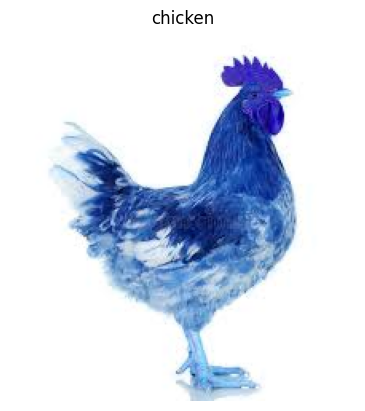

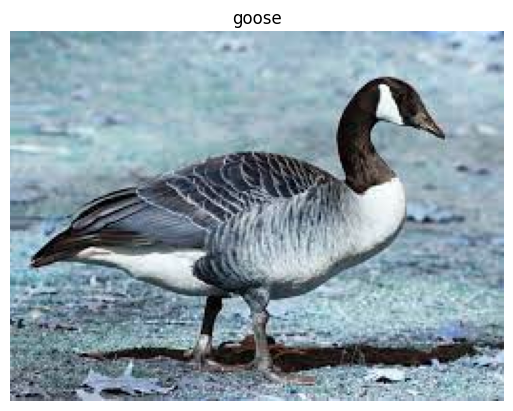

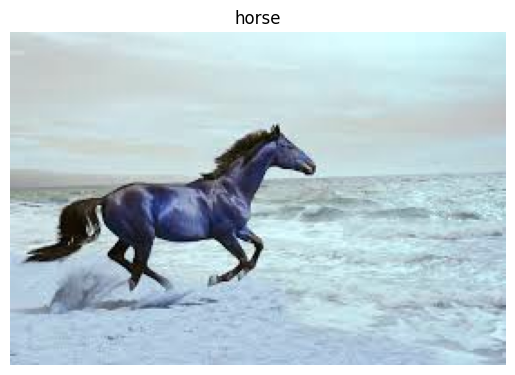

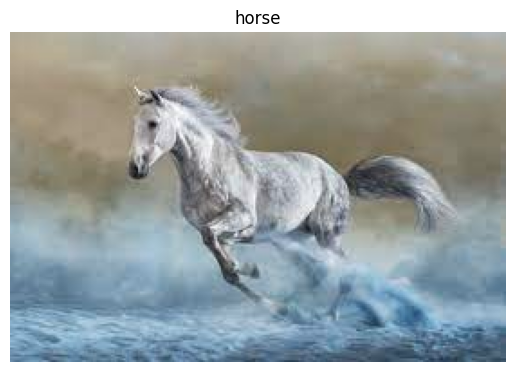

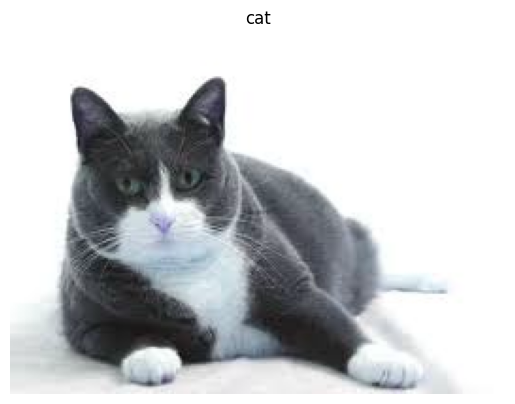

In [74]:
"""
Fill code this cell to:
1. Selecte 5 files randomly
2. Read and display them as shown in the output cell followed

NOTE:
* use comprehension if possible
"""
import functools as F
import random

path_to_data = './animals/'

random_image = random.sample(list_file_overall, 5)

for i in random_image: 
    image = cv2.imread(i['File Name'], 1)
    show_image(image, i['File Label'])





